# NeuralNetworkモデル

- インスタンス生成, 初期化例
```python
NeuralNetwork(x_vals_train, y_vals_train, hidden_layers_info=[10, 5], act_func=['tanh','softmax'], 
              threshold=0.5, loss_func='absolute', optimizer='momentum', learning_rate=0.1, drop_out=0)
```
- x_vals_train: 訓練データ特徴(array)
- y_vals_train: 訓練データラベル(array)
- x_vals_test: テストデータ特徴(array)
- y_vals_test: テストデータラベル(array)

### 評価（とりあえず）
- Precision：複勝（3位以内）の馬の予測的中割合


In [1]:
import random
import pickle as pkl
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data


np.random.seed(13)
train_size = 7
dev_sie    = 2
test_size  = 1

    
year_range = [2010, 2014] ## 2010から2014年のデータ
data_version = 1 ## dataのバージョン
data_ver_str = str(data_version) if data_version >= 10 else '0'+str(data_version)

df_all_feature = pd.read_csv("./keiba_data_new_ver{0}/keiba_feature_df_{1}_{2}.csv".format(data_ver_str, year_range[0], year_range[1]))
df_all_label   = pd.read_csv("./keiba_data_new_ver{0}/keiba_label_df_{1}_{2}.csv".format(data_ver_str, year_range[0], year_range[1]))
df_all_odds    = pd.read_csv("./keiba_data_new_ver{0}/keiba_odds_df_{1}_{2}.csv".format(data_ver_str, year_range[0], year_range[1]))


feature_arr = df_all_feature.values
label_arr   = df_all_label.values
odds_arr    = df_all_odds.values

#version = 1
# year = 2015
# period = 3
# with open("./keiba_data_ver{0}/keiba_feature_{1}".format(version, year), mode = "rb") as f:
#     feature_arr = pickle.load(f)
# with open("./keiba_data_ver{0}/keiba_label_{1}".format(version, year), mode = "rb") as f:
#     label_arr = pickle.load(f)

# for i in range(1, period-1):
#     year = year + i
#     with open("./keiba_data_ver{0}/keiba_feature_{1}".format(version, year), mode = "rb") as f:
#         feature_arr = np.r_[feature_arr, pickle.load(f)]
#     with open("./keiba_data_ver{0}/keiba_label_{1}".format(version, year), mode = "rb") as f:
#         label_arr = np.r_[label_arr, pickle.load(f)]


In [3]:
for col,val in zip(df_all_feature.isna().sum().index, df_all_feature.isna().sum().values):
    if val == 0:
        print(col, val)

df_all_feature.age.loc[1]

age 0
autumun 0
bracket_num 0
condition 0
course 0
direction 0
distance 0
h_place_num 0
h_prize 0
h_race_num 0
h_win_num 0
horse_num 0
horse_weight 0
j_place_num 0
j_prize 0
j_race_num 0
j_win_num 0
oth_age 0
oth_h_place_num 0
oth_h_prize 0
oth_h_race_num 0
oth_h_win_num 0
oth_horse_weight 0
oth_j_place_num 0
oth_j_prize 0
oth_j_race_num 0
oth_j_win_num 0
oth_weight 0
past1_arrival_num 0
past1_distance 0
past1_entry 0
past1_popularity 0
past1_time 0
past1_win_odds 0
past1_ダ 0
past1_不良 0
past1_中京 0
past1_中山 0
past1_京都 0
past1_函館 0
past1_小倉 0
past1_小雨 0
past1_小雪 0
past1_新潟 0
past1_晴 0
past1_曇 0
past1_札幌 0
past1_東京 0
past1_福島 0
past1_稍重 0
past1_良 0
past1_芝 0
past1_重 0
past1_阪神 0
past1_雨 0
past1_雪 0
past2_arrival_num 0
past2_distance 0
past2_entry 0
past2_popularity 0
past2_time 0
past2_win_odds 0
past2_ダ 0
past2_不良 0
past2_中京 0
past2_中山 0
past2_京都 0
past2_函館 0
past2_小倉 0
past2_小雨 0
past2_小雪 0
past2_新潟 0
past2_晴 0
past2_曇 0
past2_札幌 0
past2_東京 0
past2_福島 0
past2_稍重 0
past2_良 0
past2_芝 0
pa

0.18181818181818185

In [13]:
df_all_feature[df_all_feature.weight!=None][df_all_feature.weight_increase!=None]

,age,autumun,bracket_num,condition,course,direction,distance,h_place_num,h_prize,h_race_num,...,winter,セ,小雨,小雪,晴,曇,牝,牡,雨,雪
0,0.181818,0,1.000,1.0,1,1,0.36,0.000000,0.000000,0.125,...,0,0,0,0,1,0,0,1,0,0
1,0.181818,0,0.750,1.0,1,1,0.36,0.000000,0.001250,0.250,...,0,0,0,0,1,0,0,1,0,0
2,0.181818,0,0.125,1.0,1,1,0.36,0.000000,0.000000,0.125,...,0,0,0,0,1,0,0,1,0,0
3,0.181818,0,0.500,1.0,1,1,0.36,0.000000,0.000000,0.125,...,0,0,0,0,1,0,0,1,0,0
4,0.181818,0,0.875,1.0,1,1,0.36,0.000000,0.003667,0.125,...,0,0,0,0,1,0,1,0,0,0
5,0.181818,0,0.625,1.0,1,1,0.36,0.000000,0.000000,0.125,...,0,0,0,0,1,0,0,1,0,0
6,0.181818,0,0.375,1.0,1,1,0.36,0.000000,0.000000,0.250,...,0,0,0,0,1,0,0,1,0,0
7,0.181818,0,0.750,1.0,1,1,0.36,0.000000,0.000000,0.250,...,0,0,0,0,1,0,1,0,0,0
8,0.181818,0,1.000,1.0,1,1,0.36,0.000000,0.000000,0.250,...,0,0,0,0,1,0,0,1,0,0
9,0.181818,0,0.875,1.0,1,1,0.36,0.000000,0.002333,0.125,...,0,0,0,0,1,0,0,1,0,0


In [2]:
train_size = 7
dev_sie    = 2
test_size  = 1
## train, testデータの分割
trn_border = math.floor(len(feature_arr) * train_size / (train_size + dev_sie + test_size))
dev_border = math.floor(len(feature_arr) * (train_size + dev_sie) / (train_size + dev_sie + test_size))


x_vals_train = feature_arr[:trn_border]
x_vals_dev   = feature_arr[trn_border:dev_border]
x_vals_test  = feature_arr[dev_border:]
y_vals_train = label_arr[:trn_border]
y_vals_dev   = label_arr[trn_border:dev_border]
y_vals_test  = label_arr[dev_border:]

odds_train = odds_arr[:trn_border]
odds_dev   = odds_arr[trn_border:dev_border]
odds_test  = odds_arr[dev_border:]

In [3]:

## dump
# with open("./keiba_data_new_ver{0}/keiba_feature_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(x_vals_train, f)
# with open("./keiba_data_new_ver{0}/keiba_feature_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(x_vals_dev, f)
# with open("./keiba_data_new_ver{0}/keiba_feature_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(x_vals_test, f)
# with open("./keiba_data_new_ver{0}/keiba_label_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(y_vals_train, f)
# with open("./keiba_data_new_ver{0}/keiba_label_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(y_vals_dev, f)
# with open("./keiba_data_new_ver{0}/keiba_label_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(y_vals_test, f)
# with open("./keiba_data_new_ver{0}/keiba_odds_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(odds_train, f)
# with open("./keiba_data_new_ver{0}/keiba_odds_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
#     pkl.dump(odds_dev, f)  
# with open("./keiba_data_new_ver{0}/keiba_odds_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
    pkl.dump(odds_test, f)

## load
with open("./keiba_data_new_ver{0}/keiba_feature_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    x_vals_train = pkl.load(f)  
with open("./keiba_data_new_ver{0}/keiba_feature_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    x_vals_dev = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_feature_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    x_vals_test = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_label_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    y_vals_train = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_label_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    y_vals_dev = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_label_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    y_vals_test = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_odds_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    odds_dev= pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_odds_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    odds_test = pkl.load(f)


In [38]:
odds_train   = odds_arr[:trn_border]
with open("./keiba_data_new_ver{0}/keiba_odds_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'wb') as f:
    pkl.dump(odds_train, f)


In [3]:
def under_sampling(data, label, us_rate=1):
    posi_data, nega_data = [], []
    
    for (x,y) in zip(data,label):
        if y[0] == 0:
            nega_data.append(x)
        else:
            posi_data.append(x)
            
    nega_len = int(len(posi_data) * us_rate)
    
    data = nega_data[0:nega_len] + posi_data
    label = [[0] for _ in range(nega_len)] + [[1] for _ in range(len(posi_data))]
    
    return np.array(data), np.array(label)

In [4]:
x_vals_train, y_vals_train = under_sampling(x_vals_train, y_vals_train)

In [5]:
nega_num = 0
posi_num = 0
for (x,y) in zip(x_vals_train, y_vals_train):
    if y[0] == 0:
        nega_num += 1
    else:
        posi_num += 1

In [6]:
## labelを2次元に
## 1=[1,0], 0=[0,1]
y_vals_train_2 = np.array([[y[0], (y[0]+1)%2]for y in y_vals_train])
y_vals_dev_2 = np.array([[y[0], (y[0]+1)%2]for y in y_vals_dev])

In [7]:
nega_num, posi_num

(31057, 31057)

In [8]:
posi_train_len = len([1 for y in y_vals_train_2 if y[0]==1])
posi_dev_len = len([1 for y in y_vals_dev_2 if y[0]==1])
print("Train:{0:<5}, Posi:{1:<5}, Nega:{2:<5}".format(len(y_vals_train), posi_train_len, len(y_vals_train)-posi_train_len))
print("Test :{0:<5}, Posi:{1:<5}, Nega:{2:<5}".format(len(y_vals_dev), posi_dev_len, len(y_vals_dev)-posi_dev_len))


Train:62114, Posi:31057, Nega:31057
Test :42796, Posi:8795 , Nega:34001


In [37]:
## Deep Learning model
class NeuralNetwork():
    def __init__(self, x_train_data, y_train_data, hidden_layers_info=[300, 100], threshold=0.5,
                  act_func=['relu','relu'], loss_func='absolute', optimizer='adam', learning_rate=0.05, drop_out=0):
        self.sess = tf.Session()
        self.x_train_data = x_train_data
        self.y_train_data = y_train_data
        self.input_size = len(x_train_data[0])
        self.output_size = len(y_train_data[0])
        self.layers_info = [self.input_size] + hidden_layers_info + [self.output_size]
        self.act_func = act_func
        self.loss_func = loss_func
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.keep_prob_rate = 1 - drop_out
        
        self.create_placeholder()
        self.init_weights()
        
        self.set_model()        
        self.set_loss_func()
        self.set_optimize_func()
        self.train_step = self.my_opt.minimize(self.loss)
        
        ## 閾値
        self.threshold = threshold
        self.class_prediction = tf.to_float(tf.greater(self.final_output, self.threshold))
        self.correct_prediction = tf.equal((self.class_prediction), self.y_target)
        
        self.loss_vec = []
        self.test_loss = []
        self.train_precision = []
        self.test_precision = []
        self.train_accuracy = []
        self.test_accuracy = []
                
        with tf.name_scope('summary'):
            tf.summary.scalar('loss', self.loss)
            self.merged = tf.summary.merge_all()
            self.writer = tf.summary.FileWriter('./logs', self.sess.graph)
        #変数を初期化
        self.init = tf.global_variables_initializer()
        self.sess.run(self.init)
        
    def init_weights(self):
        weight_shapes = [[self.layers_info[i], self.layers_info[i+1]] for i in range(len(self.layers_info) - 1)]
        self.weights = [tf.Variable(tf.random_normal(shape, stddev=10.), name='weight_layer'+str(i+1)) for i,shape in enumerate(weight_shapes)]
        bias_shapes = [[self.layers_info[i+1]] for i in range(len(self.layers_info) - 1)]
        self.biases = [tf.Variable(tf.random_normal(shape, stddev=10.), name='bias_layer'+str(i+1)) for i,shape in enumerate(bias_shapes)]
        
    def create_placeholder(self):
        self.x_data = tf.placeholder(shape=[None, self.input_size], dtype=tf.float32, name='input_data')
        self.y_target = tf.placeholder(shape=[None, self.output_size], dtype=tf.float32, name='labels')
        self.keep_prob = tf.placeholder(dtype=tf.float32)
        
    def fully_connected(self, input_layer, weights, biases):
        return tf.add(tf.matmul(input_layer, weights), biases)
    
    def activation_func(self, input_layer, func_name):
        if func_name == 'linear':
            return tf.nn.linear(input_layer)
        elif func_name == 'relu':
            return tf.nn.relu(input_layer)
        elif func_name == 'sigmoid':
            return tf.nn.sigmoid(input_layer)
        elif func_name == 'tanh':
            return tf.nn.tanh(input_layer)
        elif func_name == 'softsign':
            return tf.nn.softsign(input_layer)
        elif func_name == 'out_softsign':
#             return tf.divide(tf.add(tf.nn.softsign(input_layer), tf.constant([1.]*self.output_size)), tf.constant([2.]*self.output_size))
            return (tf.nn.softsign(input_layer) + tf.constant(1.)) / tf.constant(2.)
#         elif func_name == 'softmax':
#             return tf.nn.softmax(input_layer)
        return input_layer
    
    def set_model(self):
        self.layers = [None] * (len(self.layers_info) - 1)
        self.layers[0] = self.x_data
        self.drop_out = [None] * (len(self.layers) - 1)
        
        for i in range(len(self.weights) - 1):
            with tf.name_scope('activation'+str(i+1)):
                if self.drop_out[0] == None:
                    self.layers[i+1] = self.activation_func(
                        self.fully_connected(self.layers[i], self.weights[i], self.biases[i]), 
                        self.act_func[0])
                else:
                    self.layers[i+1] = self.activation_func(
                        self.fully_connected(self.drop_out[i-1], self.weights[i], self.biases[i]), 
                        self.act_func[0])
                self.drop_out[i] = tf.nn.dropout(self.layers[i+1], self.keep_prob)
            
        with tf.name_scope('activation_fin'):
            self.final_output = self.activation_func(
                self.fully_connected(self.layers[-1], self.weights[-1], self.biases[-1]), 
                self.act_func[1])
            if self.act_func[1] == 'softmax':
                self.sm_final_output = tf.nn.softmax(self.final_output)
            
    def set_loss_func(self):
        if self.loss_func == 'absolute':
            with tf.name_scope('loss'):
                self.loss = tf.reduce_mean(tf.abs(self.y_target - self.final_output))
        elif self.loss_func == 'euclidean':
            with tf.name_scope('loss'):
                self.loss = tf.reduce_mean(tf.square(self.y_target - self.final_output))
        elif self.loss_func == 'hinge':
            with tf.name_scope('loss'):
                self.loss = tf.reduce_mean(tf.maximum(0., 1. - tf.multiply(self.y_target, self.final_output)))
        elif self.loss_func == 'cross_entropy':
            with tf.name_scope('loss'):
#                 self.loss = - tf.reduce_mean(tf.multiply(self.y_target, tf.log(self.final_output)) +
#                                          tf.multiply((1. - self.y_target), tf.log(1. - self.final_output)))
#                 self.loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=self.final_output, labels=self.y_target))
                self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_target, logits=self.final_output))
    
    def set_optimize_func(self):
        if self.optimizer == 'sgd':
            self.my_opt = tf.train.GradientDescentOptimizer(self.learning_rate)
        elif self.optimizer == 'momentum':
            self.my_opt = tf.train.MomentumOptimizer(self.learning_rate, momentum=0.9)
        elif self.optimizer == 'adam':
            self.my_opt = tf.train.AdamOptimizer(self.learning_rate)
        elif self.optimizer == 'adagrad':
            self.my_opt = tf.train.AdagradOptimizer(self.learning_rate)
        elif self.optimizer == 'adadelta':
            self.my_opt = tf.train.AdadeltaOptimizer(self.learning_rate)
        elif self.optimizer == 'rmsprop':
            self.my_opt = tf.train.RMSPropOptimizer(self.learning_rate)
            
    def sepate_label_data(self, x_test_data, y_test_data):
        self.true_feature = np.array([x_test_data[i] for i in range(len(x_test_data)) if y_test_data[i][0]==1])
        self.ture_label = np.array([y_test_data[i] for i in range(len(x_test_data)) if y_test_data[i][0]==1])
        self.false_feature = np.array([x_test_data[i] for i in range(len(x_test_data)) if y_test_data[i][0]==0])
        self.false_label = np.array([y_test_data[i] for i in range(len(x_test_data)) if y_test_data[i][0]==0])
        self.true_data_num = len(self.true_label)
        self.false_data_num = len(self.false_label)
            
    def classification(self, x_test_data, y_test_data):
        self.prob = self.final_output.eval(session=self.sess, feed_dict={self.x_data: x_test_data, self.keep_prob: 1})
#         print(self.prob[:20])
        self.real_num = self.class_prediction.eval(session=self.sess, feed_dict={self.x_data: x_test_data, self.keep_prob: 1})
        tp = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==1 and self.real_num[i]==y_test_data[i])])
        fp = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==1 and self.real_num[i]!=y_test_data[i])])
        fn = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==0 and self.real_num[i]!=y_test_data[i])])
        tn = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==0 and self.real_num[i]==y_test_data[i])])
        print("-"*16)
        print("TP:{0:<4}|FP:{1:<4}".format(tp, fp))
        print("FN:{0:<4}|TN:{1:<4}".format(fn, tn))
        print("-"*16)
#         if (tp + fp)==0 or (tp + fn)==0:
#             return
#         precision = tp / (tp + fp)
#         recall = tp / (tp + fn)
#         if (precision + recall)==0:
#             return
#         f_score = 2*precision*recall / (precision + recall)
#         print("Precision:{0:<4}, Recall:{1:<4}, F-score:{2:<4}".format(precision, recall, f_score))
#         self.precision.append(precision)
        if (tp + fp) == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)
        if (tp + fn) == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)
        if (precision + recall)==0:
            f_score = 0
        else:
            f_score = 2*precision*recall / (precision + recall)
        print("Precision:{0:<4}, Recall:{1:<4}, F-score:{2:<4}".format(precision, recall, f_score))
        return precision, (tp+tn)/(tp+tn+fp+fn)
        
    def classification_softmax(self, x_test_data, y_test_data):
        self.prob = self.sm_final_output.eval(session=self.sess, feed_dict={self.x_data: x_test_data, self.keep_prob: 1})
        self.real_num = self.sess.run(tf.argmax(self.prob, 1))
        y_test_data = self.sess.run(tf.argmax(y_test_data, 1))
        
        tp = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==0 and self.real_num[i]==y_test_data[i])])
        fp = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==0 and self.real_num[i]!=y_test_data[i])])
        fn = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==1 and self.real_num[i]!=y_test_data[i])])
        tn = len([1 for i in range(len(self.real_num)) if (self.real_num[i]==1 and self.real_num[i]==y_test_data[i])])
        print("-"*16)
        print("TP:{0:<5}|FP:{1:<5}".format(tp, fp))
        print("FN:{0:<5}|TN:{1:<5}".format(fn, tn))
        print("-"*16)
        if (tp + fp) == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)
        if (tp + fn) == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)
        if (precision + recall)==0:
            f_score = 0
        else:
            f_score = 2*precision*recall / (precision + recall)
        print("Precision:{0:<4}, Recall:{1:<4}, F-score:{2:<4}".format(precision, recall, f_score))
#         self.precision.append(precision)
#         self.accuracy.append((tp+tn)/(fp+fn))
        return precision, (tp+tn)/(tp+tn+fp+fn)
    
    def train0(self, x_test_data, y_test_data, batch_size=10, epoch=100):
        true_num = len([1 for label in y_test_data if label[0]==1])
        false_num = len(y_test_data) - true_num
        print("True:{0:4}, False:{1:4}".format(true_num, false_num))
        
        self.batch_size = batch_size
        self.n_batches = len(x_test_data) // self.batch_size
        self.epoch = epoch
        
        for i in range(self.epoch):
            random_train_data = np.random.permutation(len(self.x_train_data))
            epoch_loss = 0
            epoch_tst_loss = 0
            for batch_i in range(self.n_batches):
                start = batch_i * self.batch_size
                end = start + self.batch_size
                rand_index = random_train_data[start:end]
                rand_x = self.x_train_data[rand_index]
                rand_y = self.y_train_data[rand_index]
                
#             rand_index = np.random.choice(len(self.x_train_data), size=self.batch_size)
#             rand_x = self.x_train_data[rand_index]
#             rand_y = self.y_train_data[rand_index]

#             self.sess.run(self.final_output, feed_dict={self.x_data: rand_x, self.y_target: rand_y})
            
                self.sess.run(self.train_step, feed_dict={self.x_data: rand_x, self.y_target: rand_y, self.keep_prob: self.keep_prob_rate})

                temp_loss = self.sess.run(self.loss, feed_dict={self.x_data: rand_x, self.y_target: rand_y, self.keep_prob: 1})
                test_temp_loss = self.sess.run(self.loss, feed_dict={self.x_data: x_test_data, self.y_target: y_test_data, self.keep_prob: 1})
                
                epoch_loss += temp_loss
                epoch_tst_loss += test_temp_loss
                
            self.loss_vec.append(temp_loss/self.n_batches)
            self.test_loss.append(test_temp_loss/self.n_batches)

            if self.threshold != None:
#                 self.classification(x_test_data, y_test_data)
                precision, accuracy = self.classification(x_test_data, y_test_data)
                self.test_precision.append(precision)
                self.test_accuracy.append(accuracy)
                precision, accuracy = self.classification(self.x_train_data, self.y_train_data)
                self.train_accuracy.append(accuracy)
                self.train_precision.append(precision)

            if (i+1)%1 == 0:
                print('EPOCH: ' + str(i+1) + ' , Loss = ' + str(temp_loss))

            print("="*30)
            print("\n")
            
    def train(self, x_test_data, y_test_data, batch_size=10, epoch=100, softmax=True):
        true_num = len([1 for label in y_test_data if label[0]==1])
        false_num = len(y_test_data) - true_num
        print("True:{0:4}, False:{1:4}".format(true_num, false_num))
        
        self.batch_size = batch_size
        self.n_batches = len(x_test_data) // self.batch_size
        self.epoch = epoch
        
        for i in range(self.epoch):
            random_train_data = np.random.permutation(len(self.x_train_data))
            epoch_loss = 0
            epoch_tst_loss = 0
            for batch_i in range(self.n_batches):
                start = batch_i * self.batch_size
                end = start + self.batch_size
                rand_index = random_train_data[start:end]
                rand_x = self.x_train_data[rand_index]
                rand_y = self.y_train_data[rand_index]

#                 self.sess.run(self.final_output, feed_dict={self.x_data: rand_x, self.y_target: rand_y})

                self.sess.run(self.train_step, feed_dict={self.x_data: rand_x, self.y_target: rand_y, self.keep_prob: self.keep_prob_rate})

                temp_loss = self.sess.run(self.loss, feed_dict={self.x_data: rand_x, self.y_target: rand_y, self.keep_prob: 1})
                test_temp_loss = self.sess.run(self.loss, feed_dict={self.x_data: x_test_data, self.y_target: y_test_data, self.keep_prob: 1})
            
                epoch_loss += temp_loss
                epoch_tst_loss += test_temp_loss
                
            self.loss_vec.append(epoch_loss/self.n_batches)
            self.test_loss.append(epoch_tst_loss/self.n_batches)

            if self.threshold != None and softmax==True:
#                 self.classification(x_test_data, y_test_data)
                precision, accuracy = self.classification_softmax(x_test_data, y_test_data)
                self.test_precision.append(precision)
                self.test_accuracy.append(accuracy)
                precision, accuracy = self.classification_softmax(self.x_train_data, self.y_train_data)
                self.train_accuracy.append(accuracy)
                self.train_precision.append(precision)

            if (i+1)%1 == 0:
                print('EPOCH: ' + str(i+1) + ' , Loss = ' + str(temp_loss))
                
            print("="*30)
            print("\n")
            
    def test(self, x_test_data, y_test_data):
        ## テストのみ：精度を返したい
        self.test_only_loss = []
        test_temp_loss = self.sess.run(self.loss, feed_dict={self.x_data: x_test_data, self.y_target: y_test_data, self.keep_prob: 1})
        self.test_only_loss.append(test_temp_loss)
        
    def prediction(self, x_test_data):
        ## 予測に関して：1レースの出走馬情報（特徴量）を入力にランキングを返したい
        return
    
    def predict_showrate(self, x_test_data):
        if self.loss_func == 'cross_entropy':
            prob = np.array(self.sm_final_output.eval(session=self.sess, feed_dict={self.x_data: x_test_data, self.keep_prob: 1}))
        else:
            prob = np.array(self.final_output.eval(session=self.sess, feed_dict={self.x_data: x_test_data, self.keep_prob: 1}))
        prob_posi = prob.T[0]
        return prob_posi
                
    def get_loss_vec(self):
        return self.loss_vec, self.test_loss, self.train_precision, self.test_precision, self.prob, self.train_accuracy, self.test_accuracy
    
    def get_ae_loss_vec(self):
        return self.loss_vec, self.test_loss


### AutoEncoder

In [21]:
my_ae_model = NeuralNetwork(x_vals_train, x_vals_train, hidden_layers_info=[20, 10, 20], act_func=['tanh','softsign'], 
                            threshold=0.5, loss_func='absolute', optimizer='sgd', learning_rate=0.05, drop_out=0)

In [23]:
my_ae_model.train(x_vals_test, x_vals_test, batch_size=100, epoch=100, softmax=False)

True:2929, False:17050
Generation: 1 , Loss = 1.0991336


Generation: 2 , Loss = 1.1248417


Generation: 3 , Loss = 1.121429


Generation: 4 , Loss = 1.1313486


Generation: 5 , Loss = 1.0994444


Generation: 6 , Loss = 1.1306994


Generation: 7 , Loss = 1.1062071


Generation: 8 , Loss = 1.1259906


Generation: 9 , Loss = 1.106078


Generation: 10 , Loss = 1.1269184


Generation: 11 , Loss = 1.1392294


Generation: 12 , Loss = 1.0917193


Generation: 13 , Loss = 1.1078699


Generation: 14 , Loss = 1.1080066


Generation: 15 , Loss = 1.1119213


Generation: 16 , Loss = 1.1279367


Generation: 17 , Loss = 1.1196327


Generation: 18 , Loss = 1.1148123


Generation: 19 , Loss = 1.1171533


Generation: 20 , Loss = 1.108108


Generation: 21 , Loss = 1.1118491


Generation: 22 , Loss = 1.1374022


Generation: 23 , Loss = 1.1015067


Generation: 24 , Loss = 1.1007605


Generation: 25 , Loss = 1.1042869


Generation: 26 , Loss = 1.11153


Generation: 27 , Loss = 1.1062434


Generation: 28 , Lo

### 出力層1 - sigmoid

In [38]:
my_neural_model = NeuralNetwork(x_vals_train, y_vals_train, hidden_layers_info=[30, 20, 10, 5], act_func=['tanh','softsign'], 
                                threshold=0.5, loss_func='absolute', optimizer='adam', learning_rate=0.05, drop_out=0)


In [641]:
my_neural_model.train0(x_vals_test, y_vals_test, batch_size=100, epoch=5)

True:4190, False:15789


ValueError: Cannot feed value of shape (19979, 1) for Tensor 'labels_111:0', which has shape '(?, 2)'

### 出力層2 - softsign

In [24]:
my_neural_model = NeuralNetwork(x_vals_train, y_vals_train, hidden_layers_info=[512,128,64,5], act_func=['tanh','out_softsign'], 
                                threshold=0.5, loss_func='absolute', optimizer='adam', learning_rate=0.05, drop_out=0.3)


In [25]:
my_neural_model.train0(x_vals_dev, y_vals_dev, batch_size=512, epoch=50)

True:8795, False:34001
----------------
TP:2928|FP:10844
FN:5867|TN:23157
----------------
Precision:0.2126052860877142, Recall:0.3329164297896532, F-score:0.25949395134488407
----------------
TP:10056|FP:8719
FN:21001|TN:22338
----------------
Precision:0.5356058588548602, Recall:0.3237917377724829, F-score:0.40359608283833687
EPOCH: 1 , Loss = 0.48737544


----------------
TP:2739|FP:10371
FN:6056|TN:23630
----------------
Precision:0.20892448512585812, Recall:0.3114269471290506, F-score:0.2500798904359735
----------------
TP:9422|FP:8429
FN:21635|TN:22628
----------------
Precision:0.5278135678673463, Recall:0.30337766043082076, F-score:0.3852948392900957
EPOCH: 2 , Loss = 0.47588652


----------------
TP:3463|FP:13043
FN:5332|TN:20958
----------------
Precision:0.20980249606203805, Recall:0.3937464468447982, F-score:0.2737441207857397
----------------
TP:11716|FP:10161
FN:19341|TN:20896
----------------
Precision:0.5355396078072862, Recall:0.37724184563866436, F-score:0.44266445006

----------------
TP:18510|FP:10051
FN:12547|TN:21006
----------------
Precision:0.6480865515913309, Recall:0.5960009015680845, F-score:0.6209534033345634
EPOCH: 23 , Loss = 0.37366736


----------------
TP:5259|FP:18078
FN:3536|TN:15923
----------------
Precision:0.225350302095385, Recall:0.5979533826037521, F-score:0.32733723391012076
----------------
TP:15070|FP:6609
FN:15987|TN:24448
----------------
Precision:0.6951427648876793, Recall:0.4852368226164794, F-score:0.5715260922330097
EPOCH: 24 , Loss = 0.36724418


----------------
TP:7067|FP:25718
FN:1728|TN:8283
----------------
Precision:0.21555589446393167, Recall:0.8035247299602046, F-score:0.33992303992303985
----------------
TP:22862|FP:15691
FN:8195|TN:15366
----------------
Precision:0.5930018416206262, Recall:0.7361303409859291, F-score:0.6568596466024997
EPOCH: 25 , Loss = 0.37928963


----------------
TP:6568|FP:23428
FN:2227|TN:10573
----------------
Precision:0.2189625283371116, Recall:0.7467879476975554, F-score:0.3386

----------------
TP:4699|FP:16084
FN:4096|TN:17917
----------------
Precision:0.22609825338016648, Recall:0.5342808413871518, F-score:0.317736155250524
----------------
TP:13651|FP:6449
FN:17406|TN:24608
----------------
Precision:0.6791542288557214, Recall:0.4395466400489423, F-score:0.5336904040502766
EPOCH: 46 , Loss = 0.38455823


----------------
TP:5205|FP:17637
FN:3590|TN:16364
----------------
Precision:0.22786971368531653, Recall:0.5918135304150085, F-score:0.3290451054145463
----------------
TP:15150|FP:7534
FN:15907|TN:23523
----------------
Precision:0.6678716275789103, Recall:0.4878127314293074, F-score:0.5638153365214641
EPOCH: 47 , Loss = 0.37678325


----------------
TP:5901|FP:20888
FN:2894|TN:13113
----------------
Precision:0.22027697935719884, Recall:0.6709494030699261, F-score:0.33166591726618705
----------------
TP:17591|FP:10046
FN:13466|TN:21011
----------------
Precision:0.6365017910771792, Recall:0.5664101490807225, F-score:0.5994139094285618
EPOCH: 48 , Loss 

### 出力層3 - softmax

In [38]:
my_neural_model = NeuralNetwork(x_vals_train, y_vals_train_2, hidden_layers_info=[512, 128, 128, 32], act_func=['tanh','softmax'], 
                                threshold=0.5, loss_func='cross_entropy', optimizer='adam', learning_rate=0.001, drop_out=0.3)

# 'absolute', 'momentum', 0.1


In [58]:
my_neural_model.train(x_vals_dev, y_vals_dev_2, batch_size=512, epoch=20)

True:8795, False:34001
----------------
TP:4865 |FP:18128
FN:3930 |TN:15873
----------------
Precision:0.21158613491062497, Recall:0.5531552018192155, F-score:0.30609034855920475
----------------
TP:16293|FP:14789
FN:14764|TN:16268
----------------
Precision:0.5241940673058362, Recall:0.5246160285925878, F-score:0.5244049630666732
EPOCH: 1 , Loss = 19.62179


----------------
TP:4928 |FP:18175
FN:3867 |TN:15826
----------------
Precision:0.21330563130329394, Recall:0.560318362706083, F-score:0.30898488933475454
----------------
TP:16439|FP:14861
FN:14618|TN:16196
----------------
Precision:0.5252076677316294, Recall:0.5293170621759989, F-score:0.5272543579710378
EPOCH: 2 , Loss = 18.657604


----------------
TP:4949 |FP:18327
FN:3846 |TN:15674
----------------
Precision:0.21262244371885203, Recall:0.5627060830017055, F-score:0.30862773221913875
----------------
TP:16458|FP:14858
FN:14599|TN:16199
----------------
Precision:0.5255460467492655, Recall:0.5299288405190457, F-score:0.527728

In [40]:
loss_vec, test_loss, train_precision, test_precision, prob, train_acc, test_acc = my_neural_model.get_loss_vec()

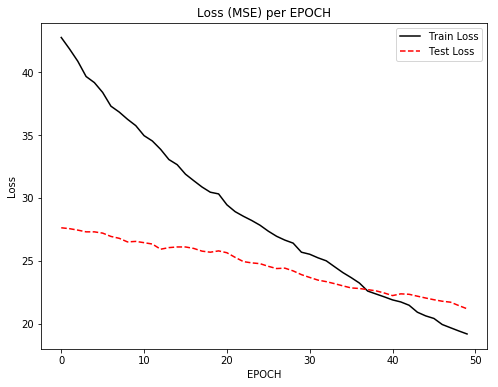

In [41]:
## Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(loss_vec, 'k-', label='Train Loss') 
plt.plot(test_loss, 'r--', label='Test Loss') 
plt.title('Loss (MSE) per EPOCH') 
plt.xlabel('EPOCH')
plt.ylabel('Loss') 
plt.legend(loc='upper right') 
plt.show()

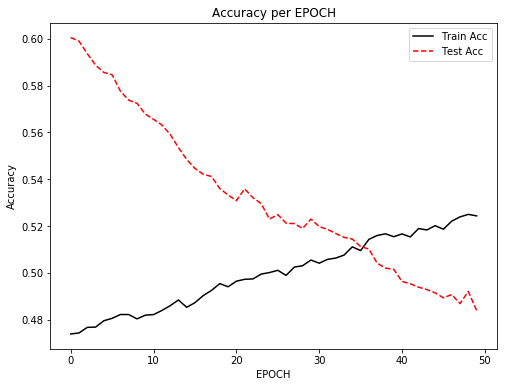

In [42]:
## Accuracy
plt.figure(figsize=(8,6))
plt.plot(train_acc, 'k-', label='Train Acc') 
plt.plot(test_acc, 'r--', label='Test Acc') 
plt.title('Accuracy per EPOCH') 
plt.xlabel('EPOCH')
plt.ylabel('Accuracy') 
plt.legend(loc='upper right') 
plt.show()

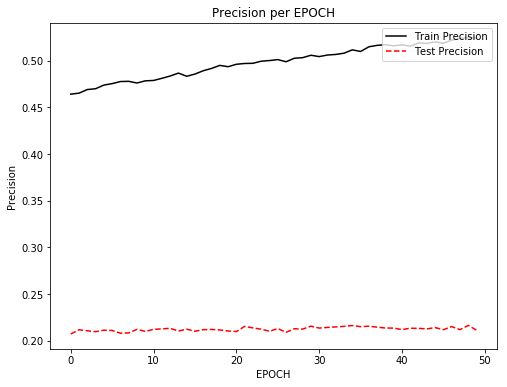

Final Precision: 0.21113961476585938


In [43]:
## Precision
plt.figure(figsize=(8,6))
plt.plot(train_precision, 'k-', label='Train Precision') 
plt.plot(test_precision, 'r--', label='Test Precision') 
plt.title('Precision per EPOCH') 
plt.xlabel('EPOCH')
plt.ylabel('Precision') 
plt.legend(loc='upper right') 
plt.show()
print("Final Precision: {}".format(test_precision[-1]))

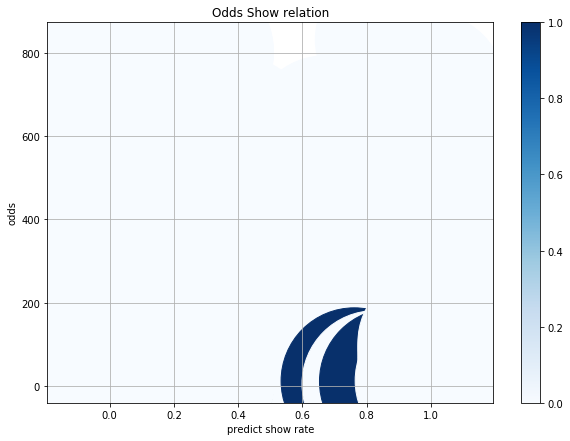

In [52]:
prob_test_posi = my_neural_model.predict_showrate(x_vals_test)
# y_vals_test
# odds_test

plt.figure(figsize=(10,7))
plt.scatter(prob_test_posi, odds_test, s=len(x_vals_test), c=y_vals_test, cmap='Blues', vmin=0., vmax=1.)
plt.title("Odds Show relation")
plt.xlabel("predict show rate")
plt.ylabel("odds")
plt.grid(True)
plt.colorbar()


In [56]:
def plot_odds_pred_ralation(model, split_val=5000, odds_threshold=30, mode='all', colors=None):
    new_x_vals_dev, new_y_vals_dev, new_odds_dev, prob_test_posi = [],[],[],[]

    # x_vals_dev_ = x_vals_dev[:split_val]
    # y_vals_dev_ = y_vals_dev[:split_val]
    # odds_dev_   = odds_dev[:split_val]

    prob_test_posi_all = model.predict_showrate(x_vals_dev)

    for i in range(len(x_vals_dev)):
        if odds_dev[i] <= odds_threshold:
            if mode == 'all':
                new_x_vals_dev.append(x_vals_dev[i])
                new_y_vals_dev.append(y_vals_dev[i])
                new_odds_dev.append(odds_dev[i])
                prob_test_posi.append(prob_test_posi_all[i])
            if mode == 'posi' and y_vals_dev[i] == 1:
                new_x_vals_dev.append(x_vals_dev[i])
                new_odds_dev.append(odds_dev[i])
                prob_test_posi.append(prob_test_posi_all[i])
            if mode == 'nega' and y_vals_dev[i] == 0:
                new_x_vals_dev.append(x_vals_dev[i])
                new_odds_dev.append(odds_dev[i])
                prob_test_posi.append(prob_test_posi_all[i])

    
    if mode == 'all':
        plt.figure(figsize=(14,8))
        plt.scatter(prob_test_posi[:split_val], new_odds_dev[:split_val], c=new_y_vals_dev[:split_val], edgecolors='blue', cmap='Blues', vmin=0., vmax=1.)
    else:
        plt.figure(figsize=(10,6))
        plt.scatter(prob_test_posi[:split_val], new_odds_dev[:split_val], edgecolors=colors[0], c=colors[1], vmin=0., vmax=1.)
    plt.title("Odds Show relation {}".format(mode))
    plt.xlabel("predict show rate")
    plt.ylabel("odds")
    plt.grid(True)
    if mode == 'all':
        plt.colorbar()
    else:
        plt.show()
#         plt.figure(figsize=(10,3))
#         plt.hist(prob_test_posi, color="orange", rwidth=0.8, alpha=0.6)
#         plt.xlabel("predict show rate")
#         plt.ylabel("frequency")
        fig, ax1 = plt.subplots(figsize=(10,3))
        # ヒストグラムプロットとビン情報の取得
        n, bins, patches = ax1.hist(prob_test_posi, color="orange", rwidth=0.8, alpha=0.7, label='Frequency')
        # 第2軸用値の算出
        y2 = np.add.accumulate(n[::-1]) / n.sum()
        y2 = y2[::-1]
#         y2 = n / n.sum()
        x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]
        # 第2軸のプロット
        ax2 = ax1.twinx()
        lines = ax2.plot(x2, y2, ls='--', color='r', marker='o', label='Cumulative ratio')
        ax2.grid(visible=False)
        [ax2.text(x, y, round(y,3), horizontalalignment="center") for x, y in zip(x2, y2)]
        plt.show()



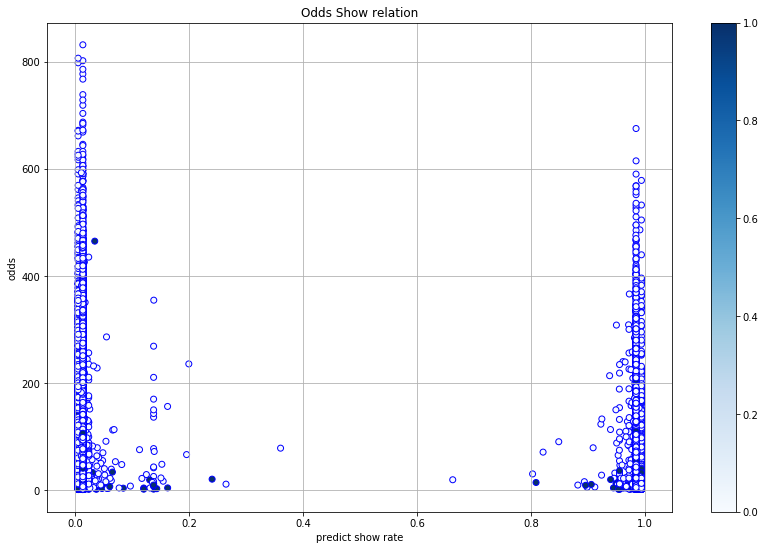

In [30]:
## softsign
prob_test_posi = my_neural_model.predict_showrate(x_vals_test)
# y_vals_test
# odds_test

plt.figure(figsize=(14,9))
plt.scatter(prob_test_posi, odds_test, c=y_vals_test, edgecolors='blue', cmap='Blues', vmin=0., vmax=1.)
plt.title("Odds Show relation")
plt.xlabel("predict show rate")
plt.ylabel("odds")
plt.grid(True)
plt.colorbar()



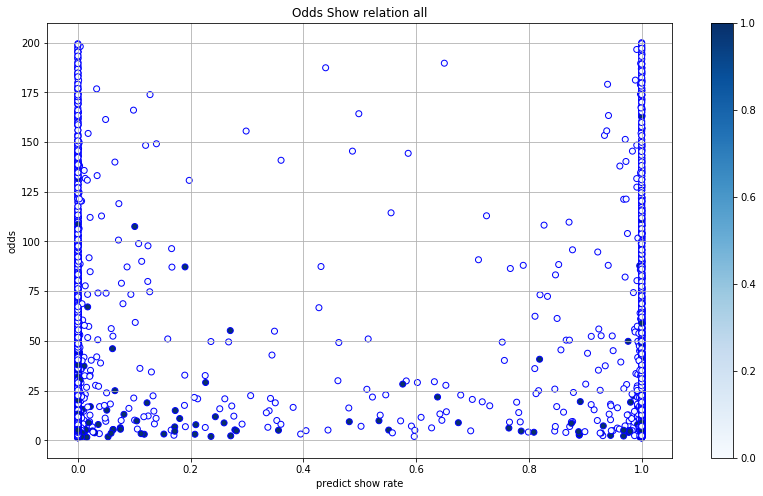

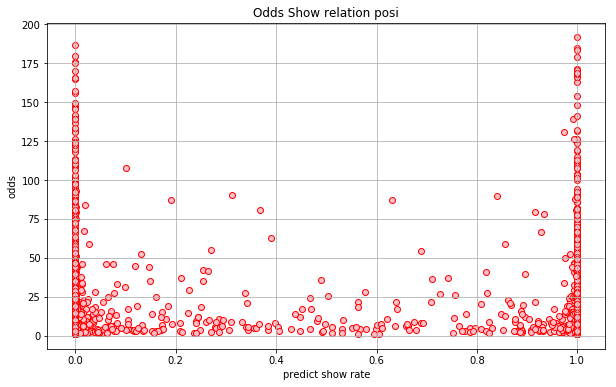

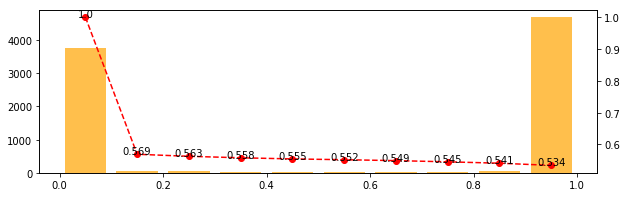

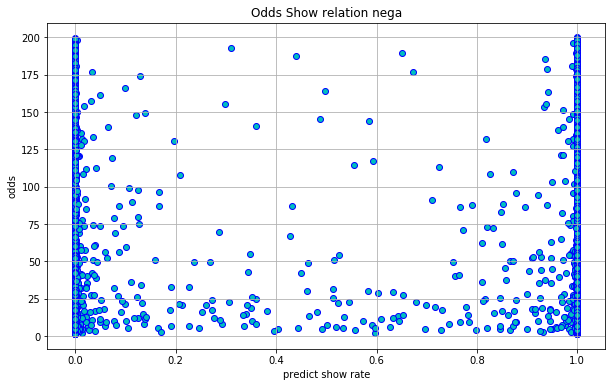

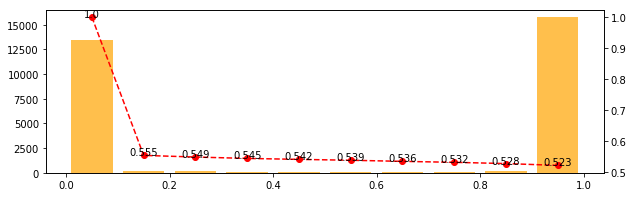

In [57]:


# new_x_vals_dev, new_y_vals_dev, new_odds_dev = [],[],[]


# for i in range(len(x_vals_dev)):
#     if odds_dev[i] <= 100:
#         new_x_vals_dev.append(x_vals_dev[i])
#         new_y_vals_dev.append(y_vals_dev[i])
#         new_odds_dev.append(odds_dev[i])

# prob_test_posi = my_neural_model.predict_showrate(new_x_vals_dev)
# # y_vals_test
# # odds_test


# plt.figure(figsize=(14,9))
# plt.scatter(prob_test_posi, new_odds_dev, c=new_y_vals_dev, edgecolors='blue', cmap='Blues', vmin=0., vmax=1.)
# plt.title("Odds Show relation")
# plt.xlabel("predict show rate")
# plt.ylabel("odds")
# plt.grid(True)
# plt.colorbar()

plot_odds_pred_ralation(my_neural_model, split_val=5000, odds_threshold=200, mode='all')
plot_odds_pred_ralation(my_neural_model, split_val=5000, odds_threshold=200, mode='posi', colors=["red", "pink"])
plot_odds_pred_ralation(my_neural_model, split_val=5000, odds_threshold=200, mode='nega', colors=["blue", "c"])

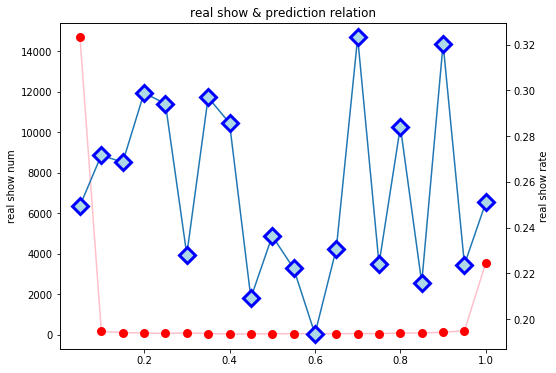

In [61]:
prob_show_rate_list = [0.05*(i+1) for i in range(20)]
show_rate_list = [[0,0] for i in range(20)]

for prob, real, odds in zip(prob_test_posi, new_y_vals_dev, new_odds_dev):
    for idx in range(len(prob_show_rate_list)):
        border = prob_show_rate_list[idx]
        if prob < border:
            if real == 1:
                show_rate_list[idx][0] += 1
            show_rate_list[idx][1] += 1
            break

all_num_list = [li[1] for li in show_rate_list]
show_rate_list = [li[0]/li[1] if li[1]!=0 else 0 for li in show_rate_list]

# plt.figure(figsize=(10,8))
_, ax1 = plt.subplots(figsize=(8,6))
plt.title("real show & prediction relation")
ax1.plot(prob_show_rate_list, all_num_list, marker=".", color="pink", markersize=12, markeredgewidth=3, 
         markeredgecolor="r", markerfacecolor="r")
plt.ylabel("real show num")
ax2 = ax1.twinx()
ax2.plot(prob_show_rate_list, show_rate_list, marker="D", markersize=12, markeredgewidth=3, 
         markeredgecolor="blue", markerfacecolor="lightblue")
plt.xlabel("predict show rate")
plt.ylabel("real show rate")

plt.show()

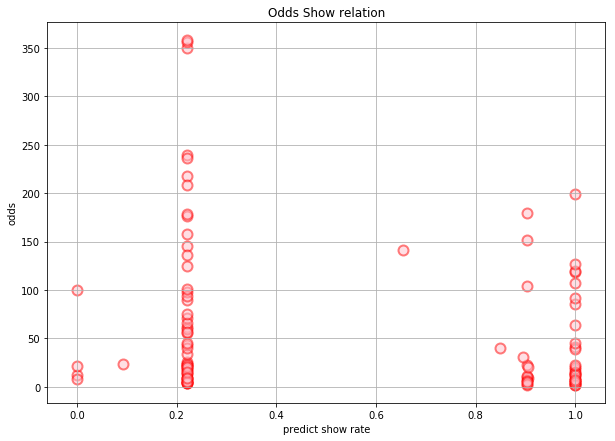

In [65]:
prob_test_posi = my_neural_model.predict_showrate(x_vals_test[:100])

plt.figure(figsize=(10,7))
plt.scatter(prob_test_posi, odds_test[:100], c="pink", alpha=0.5, linewidths="2", edgecolors="red")
plt.title("Odds Show relation")
plt.xlabel("predict show rate")
plt.ylabel("odds")
plt.grid(True)


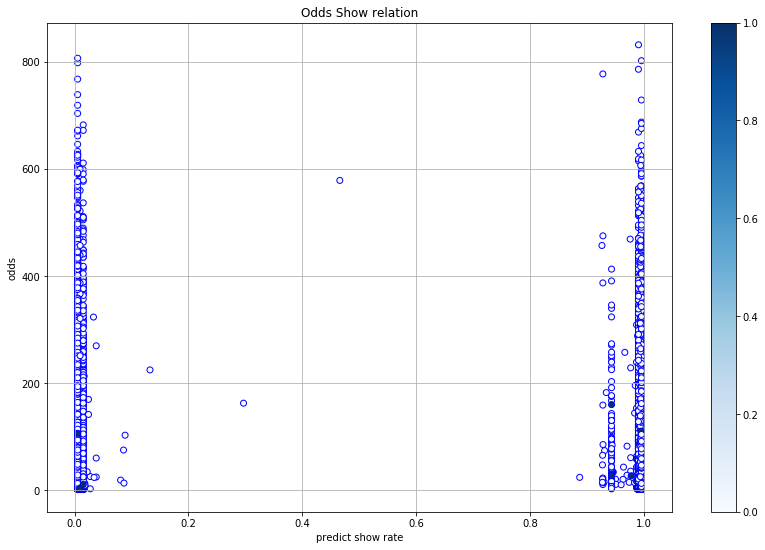

In [36]:
prob_test_posi = my_neural_model.predict_showrate(x_vals_test)
# y_vals_test
# odds_test

plt.figure(figsize=(14,9))
plt.scatter(prob_test_posi, odds_test, c=y_vals_test, edgecolors='blue', cmap='Blues', vmin=0., vmax=1.)
plt.title("Odds Show relation")
plt.xlabel("predict show rate")
plt.ylabel("odds")
plt.grid(True)
plt.colorbar()




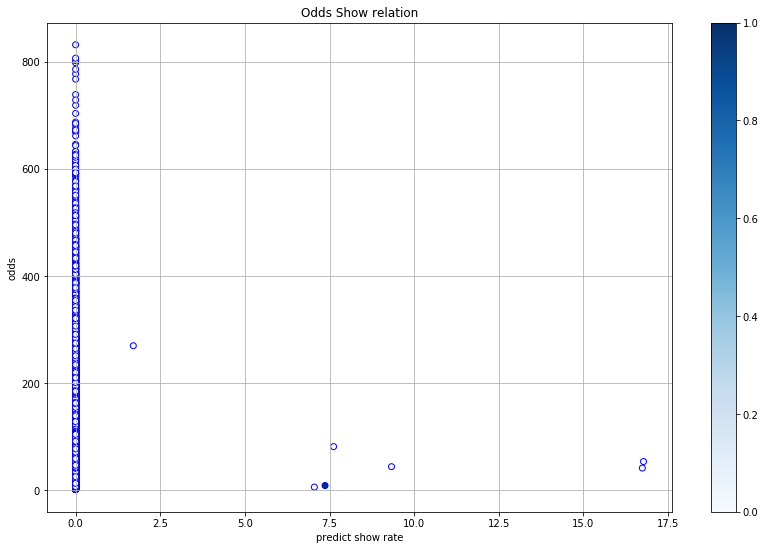

In [60]:
prob_test_posi = my_neural_model.predict_showrate(x_vals_test)
# y_vals_test
# odds_test

plt.figure(figsize=(14,9))
plt.scatter(prob_test_posi, odds_test, c=y_vals_test, edgecolors='blue', cmap='Blues', vmin=0., vmax=1.)
plt.title("Odds Show relation")
plt.xlabel("predict show rate")
plt.ylabel("odds")
plt.grid(True)
plt.colorbar()


